# 📱 **Predicting Mobile Phone Price Range: A Comprehensive Machine Learning Approach With Grid Search With Multiple Hyper Parameters For  Logistic Regression**

**🎯 Goal:** Develop a robust classification model to accurately predict the price range of mobile phones using advanced data processing and machine learning techniques.

---

### **Key Components:**
- **🔍 Data Cleaning:** Employ various techniques to prepare and enhance the quality of the dataset.
- **🛠️ Feature Engineering:** Create meaningful features to boost model performance.
- **🤖 Model Creation:** Experiment with Grid Search With Multiple Hyper Parameters Of Logistic Regression to build the best predictive model.
- **🚀 Model Deployment:** Deploy the final model for practical, real-world applications.

---

### **Dataset Overview:**
The dataset includes several key features related to mobile phones, which will be used to predict the target variable, **price_range**:

- **Battery Power:** 🔋 Total energy storage capacity (mAh).
- **Bluetooth Support:** 📡 Availability of Bluetooth functionality.
- **Clock Speed:** 🕒 Processor speed (GHz).
- **Dual SIM Support:** 📶 Ability to support two SIM cards.
- **Front Camera:** 📸 Resolution in megapixels.
- **4G Support:** 📱 Availability of 4G network compatibility.
- **Internal Memory:** 💾 Storage capacity in Gigabytes.
- **Mobile Depth:** 📏 Physical depth of the mobile (cm).
- **Weight:** ⚖️ Weight of the mobile (grams).
- **Processor Cores:** 💻 Number of cores in the CPU.
- **Primary Camera:** 📷 Main camera resolution (megapixels).
- **Pixel Resolution:** 📺 Display resolution in height and width (pixels).
- **RAM:** 💡 Random Access Memory (MB).
- **Screen Size:** 📐 Screen dimensions (cm).
- **Talk Time:** 📞 Maximum talk time on a single charge (hours).
- **3G Support:** 📡 Availability of 3G network compatibility.
- **Touch Screen:** 🖱️ Presence of a touch interface.
- **WiFi Support:** 🌐 Availability of WiFi connectivity.

---

**📝 Target Variable:** The **price_range** variable categorizes phones into four distinct cost groups:

- **0:** Low cost
- **1:** Medium cost
- **2:** High cost
- **3:** Very high cost

---

**✨ Let's dive into the process of transforming raw mobile phone data into valuable predictions!**


## 🚀 Beginning with Importing Necessary Libraries

To kick off our analysis, we first need to import the essential libraries that will enable us to manipulate data, visualize trends, and build machine learning models. These libraries form the backbone of our data science workflow.

### **Library Overview:**
- **NumPy**: Fundamental package for numerical computation, providing support for arrays and matrices.
- **Pandas**: Powerful data manipulation and analysis library, crucial for handling structured data.
- **Matplotlib & Seaborn**: Visualization libraries that allow us to create insightful plots and graphs.
- **Scikit-learn**: A comprehensive machine learning library, used for building models, evaluating performance, and splitting data into training and testing sets.

**These libraries will be used extensively as we move through data exploration, feature engineering, model building, and evaluation. Let's dive into the data next!**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Setting display options to ensure we can see all columns when inspecting data
pd.set_option("display.max_columns", None)

## 📥 Gathering the Data and Displaying Initial Information

With the necessary libraries imported, the next step is to load our dataset into a DataFrame. This allows us to inspect the structure of the data and gain an initial understanding of its contents.


### **Data Overview:**
- **`head()`**: Displays the first 5 rows of the DataFrame, providing a glimpse into the data.
- **`info()`**: Provides a concise summary of the DataFrame, including the data types of each column and the number of non-null entries.

---

### **What We Learn From This:**
- **Data Structure**: By looking at the first few rows, we can quickly verify the structure of the data and ensure that it has been loaded correctly.
- **Data Types**: Understanding the data types helps us determine whether any conversions or adjustments are needed before proceeding.
- **Missing Values**: The `info()` summary helps identify any missing data that may need to be addressed during the cleaning phase.

**With this initial exploration, we're ready to dive deeper into the data and start the cleaning and preprocessing steps.**

In [32]:
# Loading the dataset
data = pd.read_csv(r'./Data.csv')

# Displaying the first few rows of the dataset to get an overview
print("🔍 First 5 rows of the dataset:")
display(data.head())

🔍 First 5 rows of the dataset:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [33]:
# Showing information about the dataset, including data types and non-null counts
print("ℹ️ Dataset Information:")
data.info()

ℹ️ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null

## 🛠️ Cleaning and Transformation

**In this section, we will clean and prepare the data for further analysis. Our main focus will be on three essential tasks: removing duplicates, handling missing values, and splitting the data into numerical, categorical, and target variables. We’ll also inspect the data’s structure and summarize the numerical features.**

### 1️⃣ **Checking and Dropping Duplicates**

First, let's check if there are any duplicate rows in our dataset. Duplicates can distort our analysis, so it's crucial to remove them if found.

In [34]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"🔄 Number of duplicate rows: {duplicates}")

# Dropping duplicates if found
if duplicates > 0:
    data = data.drop_duplicates()
    print("✅ Duplicates dropped.")
else:
    print("✅ No duplicates found.")

🔄 Number of duplicate rows: 0
✅ No duplicates found.


### 2️⃣ **Handling Missing Values**

Next, we will check for any missing values. If the number of missing values in any column is less than 5% of the total, we’ll drop those rows. This step ensures the integrity of our data.

In [35]:
# Checking for missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
print("🕵️‍♂️ Missing data overview:")
print(missing_percentage[missing_percentage > 0])

# Dropping rows with missing values if they constitute less than 5% of the total data
columns_to_drop = missing_percentage[missing_percentage < 5].index
if not columns_to_drop.empty:
    data = data.dropna(subset=columns_to_drop)
    print(f"\n\n✅ Rows with missing values in columns {columns_to_drop.tolist()} dropped.")
else:
    print("\n\n✅ No significant missing values found.")

🕵️‍♂️ Missing data overview:
fc            0.25
four_g        0.25
int_memory    0.25
m_dep         0.25
mobile_wt     0.20
n_cores       0.20
pc            0.25
px_height     0.20
px_width      0.10
ram           0.10
sc_h          0.05
sc_w          0.05
dtype: float64


✅ Rows with missing values in columns ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'] dropped.


In [36]:
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

if missing_percentage.sum() == 0:
    print("✅ No null values found.")
else:
    print("🕵️‍♂️ Missing data overview:")
    print(missing_percentage[missing_percentage > 0])

✅ No null values found.


### 3️⃣ **Splitting the Data into Numerical, Categorical, and Target Variables**

Now that our data is clean, we can split it into three parts: numerical features, categorical features, and the target variable. This ensures that each data type can be handled appropriately.


In [37]:
# To Get Vision About My Data In Addition To The Description At The Intoduction Above

data.nunique()

battery_power    1090
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1132
px_width         1107
ram              1556
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

#### 1.Categorical

In [38]:
# Specifying the categorical columns manually
CategricalDataColumns = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

# Extracting the categorical data and converting to integers
CategoricalData = data[CategricalDataColumns].astype('int')

In [39]:
CategoricalData.head(2)

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0


In [40]:
CategoricalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   blue          1991 non-null   int64
 1   dual_sim      1991 non-null   int64
 2   four_g        1991 non-null   int64
 3   n_cores       1991 non-null   int64
 4   three_g       1991 non-null   int64
 5   touch_screen  1991 non-null   int64
 6   wifi          1991 non-null   int64
dtypes: int64(7)
memory usage: 124.4 KB


#### 2.Target 

In [41]:
# Extracting the target variable
Target = pd.DataFrame({'price_range': data['price_range']})

In [42]:
Target.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [43]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price_range  1991 non-null   int64
dtypes: int64(1)
memory usage: 31.1 KB


#### 3.Numerical

In [44]:
# Identifying the numerical columns by excluding categorical and target columns
UnnessaryCoulmn = CategricalDataColumns + ['price_range']

NumericalData = data.drop(columns=UnnessaryCoulmn)

In [45]:
NumericalData.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1.0,7.0,0.6,188.0,2.0,20.0,756.0,2549.0,9.0,7.0,19
1,1021,0.5,0.0,53.0,0.7,136.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7
2,563,0.5,2.0,41.0,0.9,145.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9
3,615,2.5,0.0,10.0,0.8,131.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11
4,1821,1.2,13.0,44.0,0.6,141.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15


In [46]:
NumericalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   clock_speed    1991 non-null   float64
 2   fc             1991 non-null   float64
 3   int_memory     1991 non-null   float64
 4   m_dep          1991 non-null   float64
 5   mobile_wt      1991 non-null   float64
 6   pc             1991 non-null   float64
 7   px_height      1991 non-null   float64
 8   px_width       1991 non-null   float64
 9   ram            1991 non-null   float64
 10  sc_h           1991 non-null   float64
 11  sc_w           1991 non-null   float64
 12  talk_time      1991 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 217.8 KB


In [47]:
NumericalData.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,1.522451,4.307885,32.074335,0.502009,140.263184,9.909091,644.800603,1251.115520,2123.632848,12.307885,5.774485,11.001507
std,439.641057,0.815499,4.339735,18.138177,0.288622,35.398777,6.061019,442.951035,431.924893,1085.051293,4.213061,4.357385,5.464872
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.500000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.500000,875.500000,1207.000000,9.000000,2.000000,6.000000
50%,1225.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000
75%,1615.500000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.500000,1633.000000,3065.000000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


## 🚀 Feature Engineering

After cleaning and preparing the data, the next crucial step is feature engineering. This process involves creating new features or transforming existing ones to improve the performance of our machine learning models. We’ll begin with numerical features, followed by categorical features.

### 1️⃣ **Numerical Features**

We’ll focus on transforming existing numerical columns and creating new ones that capture relevant information about the mobile phones.

#### Mobile Phone Numerical Features
- **battery_power**: Total energy a battery can store at one time, measured in mAh
- **clock_speed**: The speed at which the microprocessor executes instructions
- **fc**: Front Camera megapixels
- **int_memory**: Internal Memory in Gigabytes
- **m_dep**: Mobile Depth in cm
- **mobile_wt**: Weight of the mobile phone
- **pc**: Primary Camera megapixels
- **px_height**: Pixel Resolution Height
- **px_width**: Pixel Resolution Width
- **ram**: Random Access Memory in Megabytes
- **sc_h**: Screen Height of the mobile in cm
- **sc_w**: Screen Width of the mobile in cm
- **talk_time**: Longest time that a single battery charge will last during use

#### 📐 **RAM Conversion (MB to GB)**

- **Original Column**: `ram`
- **New Column**: `ram_gb`
- **Description**: Converts the RAM from megabytes to gigabytes for better interpretability.

In [48]:
NumericalData['ram'].head(2)

0    2549.0
1    2631.0
Name: ram, dtype: float64

In [49]:
# Convert RAM from MB to GB
NumericalData['ram'] = NumericalData['ram'] / 1024

In [50]:
print("🔄 RAM converted from MB to GB\n")
print(NumericalData['ram'].head(2))

🔄 RAM converted from MB to GB

0    2.489258
1    2.569336
Name: ram, dtype: float64


#### 🖥️ **Screen Area Calculation**

- **Original Columns**: `sc_h`, `sc_w`
- **New Column**: `sc_area`
- **Description**: Calculates the screen area (height x width) to capture the overall screen size.

In [51]:
# Calculate screen area
NumericalData['sc_area'] = NumericalData['sc_h'] * NumericalData['sc_w']

In [52]:
print("📐 Screen area calculated\n")
print(NumericalData[['sc_h', 'sc_w', 'sc_area']].head())

📐 Screen area calculated

   sc_h  sc_w  sc_area
0   9.0   7.0     63.0
1  17.0   3.0     51.0
2  11.0   2.0     22.0
3  16.0   8.0    128.0
4   8.0   2.0     16.0


#### 🔋 **Battery Efficiency Calculation**

- **Original Columns**: `battery_power`, `talk_time`
- **New Column**: `battery_efficiency`
- **Description**: Calculates battery efficiency by dividing talk time by battery power, providing a measure of how long the battery lasts relative to its capacity.

In [54]:
# Calculate battery efficiency (talk time per mAh)
NumericalData['Battery_Efficiency'] = NumericalData['talk_time'] / NumericalData['battery_power']

In [56]:
print("🔋 Battery efficiency calculated\n")
print(NumericalData[['battery_power', 'talk_time', 'Battery_Efficiency']].head())

🔋 Battery efficiency calculated

   battery_power  talk_time  Battery_Efficiency
0            842         19            0.022565
1           1021          7            0.006856
2            563          9            0.015986
3            615         11            0.017886
4           1821         15            0.008237


### 2️⃣ **Categorical Features**

For categorical features, we’ll create a new feature based on the phone's network connectivity capabilities.

#### Mobile Phone Features

- **blue**: Has Bluetooth or not
- **dual_sim**: Has dual SIM support or not
- **four_g**: Has 4G or not
- **n_cores**: Number of cores in the processor
- **three_g**: Has 3G or not
- **touch_screen**: Has a touch screen or not
- **wifi**: Has WiFi or not

#### **New Feature: New_1**

**Description**: 
The feature `New_1` is a binary indicator that signifies whether a mobile phone supports both 3G and 4G connectivity.

- **New_1 = 1**: The phone supports both 3G and 4G networks, indicating that it is considered **NEW** in terms of its connectivity features.
- **New_1 = 0**: The phone does not support both 3G and 4G networks, indicating that it is considered **OLD**.

In [57]:
CategoricalData.head()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0
2,1,1,1,5,1,1,0
3,1,0,0,6,1,0,0
4,1,0,1,2,1,1,0


In [58]:
CategoricalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   blue          1991 non-null   int64
 1   dual_sim      1991 non-null   int64
 2   four_g        1991 non-null   int64
 3   n_cores       1991 non-null   int64
 4   three_g       1991 non-null   int64
 5   touch_screen  1991 non-null   int64
 6   wifi          1991 non-null   int64
dtypes: int64(7)
memory usage: 124.4 KB


In [59]:
# Create New_1 feature: 1 if both 3G and 4G are supported, else 0
CategoricalData['New_1'] = ((CategoricalData['four_g'] == 1) & (CategoricalData['three_g'] == 1)).astype(int)

In [60]:
print("📡 New feature 'New_1' created\n")
print(CategoricalData[['three_g', 'four_g', 'New_1']].head())

📡 New feature 'New_1' created

   three_g  four_g  New_1
0        0       0      0
1        1       1      1
2        1       1      1
3        1       0      0
4        1       1      1


**There Is No BIAS To Any Category On New Features**

In [61]:
CategoricalData['New_1'].value_counts()

New_1
1    1037
0     954
Name: count, dtype: int64

In [62]:
CategoricalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   blue          1991 non-null   int64
 1   dual_sim      1991 non-null   int64
 2   four_g        1991 non-null   int64
 3   n_cores       1991 non-null   int64
 4   three_g       1991 non-null   int64
 5   touch_screen  1991 non-null   int64
 6   wifi          1991 non-null   int64
 7   New_1         1991 non-null   int64
dtypes: int64(8)
memory usage: 140.0 KB


### **🟢 Data is Ready for Model Building**

With the newly engineered features, our dataset is now enhanced and ready for model building. These features will provide additional insights and improve the predictive power of our machine learning models.

### Explanation:
- **Numerical Features**: 
  - We converted the `ram` column from MB to GB, calculated the screen area from the height and width, and created a battery efficiency feature.
- **Categorical Features**: 
  - We created a new binary feature `New_1` that indicates whether the mobile phone supports both 3G and 4G connectivity.
- **Final Step**: The data, now enriched with these features, is ready for the next steps in building and optimizing machine learning models.

## Scaling Numerical Features & Encoding Categorical Features

In this section, we'll continue our feature engineering by scaling the numerical features and encoding the categorical ones. This ensures that all features are on a similar scale and that categorical variables are converted into a numerical format suitable for machine learning models.

### 1️⃣ **Scaling Numerical Features**

Scaling numerical features is crucial for models that rely on distance calculations, such as k-NN or SVM. We'll use Min-Max scaling to normalize all numerical features to a range between 0 and 1.

- **Min-Max Scaling**: This technique scales the data to a fixed range, typically 0 to 1. It’s effective when the distribution of the data is unknown or has varying scales.

In [63]:
NumericalData.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,sc_area,Battery_Efficiency
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1238.270718,1.522451,4.307885,32.074335,0.502009,140.263184,9.909091,644.800603,1251.115520,2.073860,12.307885,5.774485,11.001507,80.381718,0.010210
std,439.641057,0.815499,4.339735,18.138177,0.288622,35.398777,6.061019,442.951035,431.924893,1.059620,4.213061,4.357385,5.464872,76.881341,0.006772
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,0.250000,5.000000,0.000000,2.000000,0.000000,0.001011
25%,851.500000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.500000,875.500000,1.178711,9.000000,2.000000,6.000000,19.000000,0.005353
50%,1225.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2.096680,12.000000,5.000000,11.000000,55.000000,0.008953
75%,1615.500000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.500000,1633.000000,2.993164,16.000000,9.000000,16.000000,123.000000,0.013201
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3.904297,19.000000,18.000000,20.000000,342.000000,0.039841


In [64]:
print("Original Data")
NumericalData.head(2)

Original Data


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,sc_area,Battery_Efficiency
0,842,2.2,1.0,7.0,0.6,188.0,2.0,20.0,756.0,2.489258,9.0,7.0,19,63.0,0.022565
1,1021,0.5,0.0,53.0,0.7,136.0,6.0,905.0,1988.0,2.569336,17.0,3.0,7,51.0,0.006856


In [65]:
# NumericalData = (NumericalData - NumericalData.min()) / (NumericalData. max() - NumericalData.min() )
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
NumericalData1 = scaler.fit_transform(NumericalData)

# Create a DataFrame with the scaled data
NumericalData2 = pd.DataFrame(NumericalData1, columns=NumericalData.columns)

In [69]:
print("📏 Numerical Features After Scaling\n")
NumericalData2.head(2)

📏 Numerical Features After Scaling



,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,sc_area,Battery_Efficiency
0,0.227789,0.68,0.052632,0.080645,0.555556,0.900000,0.1,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.184211,0.555104
1,0.347361,0.00,0.000000,0.822581,0.666667,0.466667,0.3,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,0.149123,0.150538


In [68]:
NumericalData2.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,sc_area,Battery_Efficiency
count,1991.000000,1991.00000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,0.492499,0.40898,0.226731,0.485070,0.446677,0.502193,0.495455,0.328980,0.501412,0.499100,0.521992,0.320805,0.500084,0.235034,0.236912
std,0.293681,0.32620,0.228407,0.292551,0.320691,0.294990,0.303051,0.225995,0.288334,0.289966,0.300933,0.242077,0.303604,0.224799,0.174413
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234135,0.08000,0.052632,0.225806,0.111111,0.241667,0.250000,0.144133,0.250668,0.254142,0.285714,0.111111,0.222222,0.055556,0.111840
50%,0.483634,0.40000,0.157895,0.483871,0.444444,0.508333,0.500000,0.287755,0.498665,0.505345,0.500000,0.277778,0.500000,0.160819,0.204547
75%,0.744489,0.68000,0.368421,0.741935,0.777778,0.750000,0.750000,0.483418,0.756342,0.750668,0.785714,0.500000,0.777778,0.359649,0.313951
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Save Scaler For Further Usages**

In [70]:
import joblib
joblib.dump(scaler, './Models/scaler.pkl')

['./Models/scaler.pkl']

### 2️⃣ **Encoding Categorical Features**

Categorical features need to be encoded into a format that machine learning models can understand. We'll use one-hot encoding to convert each categorical variable into a new binary column for each unique value.


- **One-Hot Encoding**: This encoding technique transforms categorical variables into a series of binary columns, one for each category. It is particularly useful for models that cannot handle categorical data directly.

---

In [71]:
CategoricalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   blue          1991 non-null   int64
 1   dual_sim      1991 non-null   int64
 2   four_g        1991 non-null   int64
 3   n_cores       1991 non-null   int64
 4   three_g       1991 non-null   int64
 5   touch_screen  1991 non-null   int64
 6   wifi          1991 non-null   int64
 7   New_1         1991 non-null   int64
dtypes: int64(8)
memory usage: 140.0 KB


In [72]:
CategoricalData.head(2)

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,New_1
0,0,0,0,2,0,0,1,0
1,1,1,1,3,1,1,0,1


In [73]:
# One-Hot Encoding Categorical Features
ECategoricalData = pd.get_dummies(CategoricalData, columns=CategoricalData.columns).astype(int)

print("\n🏷️ One-Hot Encoded DataFrame:\n")
print(ECategoricalData.head(2))


🏷️ One-Hot Encoded DataFrame:

   blue_0  blue_1  dual_sim_0  dual_sim_1  four_g_0  four_g_1  n_cores_1  \
0       1       0           1           0         1         0          0   
1       0       1           0           1         0         1          0   

   n_cores_2  n_cores_3  n_cores_4  n_cores_5  n_cores_6  n_cores_7  \
0          1          0          0          0          0          0   
1          0          1          0          0          0          0   

   n_cores_8  three_g_0  three_g_1  touch_screen_0  touch_screen_1  wifi_0  \
0          0          1          0               1               0       0   
1          0          0          1               0               1       1   

   wifi_1  New_1_0  New_1_1  
0       1        1        0  
1       0        0        1  


In [74]:
ECategoricalData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   blue_0          1991 non-null   int64
 1   blue_1          1991 non-null   int64
 2   dual_sim_0      1991 non-null   int64
 3   dual_sim_1      1991 non-null   int64
 4   four_g_0        1991 non-null   int64
 5   four_g_1        1991 non-null   int64
 6   n_cores_1       1991 non-null   int64
 7   n_cores_2       1991 non-null   int64
 8   n_cores_3       1991 non-null   int64
 9   n_cores_4       1991 non-null   int64
 10  n_cores_5       1991 non-null   int64
 11  n_cores_6       1991 non-null   int64
 12  n_cores_7       1991 non-null   int64
 13  n_cores_8       1991 non-null   int64
 14  three_g_0       1991 non-null   int64
 15  three_g_1       1991 non-null   int64
 16  touch_screen_0  1991 non-null   int64
 17  touch_screen_1  1991 non-null   int64
 18  wifi_0          1991 non-null   i

**Save the column names used for one-hot encoding For Further Usages Also**

In [75]:
joblib.dump(ECategoricalData.columns.tolist(), 'Models/one_hot_encoder_columns.joblib')

['Models/one_hot_encoder_columns.joblib']

### **🔗 Data Transformation Complete**

With the numerical features scaled and the categorical features encoded, our data is now fully prepared for input into machine learning models. These transformations help ensure that the models can effectively learn from the data without being skewed by varying feature scales or non-numeric data.

## Finalizing the Data Preparation and Model Training

In this section, we'll concatenate the transformed features and then proceed to model training and evaluation. We'll use logistic regression models with different configurations to assess their performance.

### **1️⃣ Concatenating the Data**

We first combine the scaled numerical features and one-hot encoded categorical features into a single DataFrame, which will serve as the input to our models.


- **Concatenation**: This step combines both numerical and categorical features into one DataFrame, preparing it for model training.


In [76]:
# Concatenating the transformed features
Features = pd.concat([NumericalData, ECategoricalData], axis=1)

In [77]:
Target = Target.values.flatten()  # Flatten the target array

In [78]:
Features.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,sc_area,Battery_Efficiency,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,n_cores_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1,New_1_0,New_1_1
0,842,2.2,1.0,7.0,0.6,188.0,2.0,20.0,756.0,2.489258,9.0,7.0,19,63.0,0.022565,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,1021,0.5,0.0,53.0,0.7,136.0,6.0,905.0,1988.0,2.569336,17.0,3.0,7,51.0,0.006856,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1
2,563,0.5,2.0,41.0,0.9,145.0,6.0,1263.0,1716.0,2.541992,11.0,2.0,9,22.0,0.015986,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
3,615,2.5,0.0,10.0,0.8,131.0,9.0,1216.0,1786.0,2.704102,16.0,8.0,11,128.0,0.017886,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
4,1821,1.2,13.0,44.0,0.6,141.0,14.0,1208.0,1212.0,1.377930,8.0,2.0,15,16.0,0.008237,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1


In [79]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power       1991 non-null   int64  
 1   clock_speed         1991 non-null   float64
 2   fc                  1991 non-null   float64
 3   int_memory          1991 non-null   float64
 4   m_dep               1991 non-null   float64
 5   mobile_wt           1991 non-null   float64
 6   pc                  1991 non-null   float64
 7   px_height           1991 non-null   float64
 8   px_width            1991 non-null   float64
 9   ram                 1991 non-null   float64
 10  sc_h                1991 non-null   float64
 11  sc_w                1991 non-null   float64
 12  talk_time           1991 non-null   int64  
 13  sc_area             1991 non-null   float64
 14  Battery_Efficiency  1991 non-null   float64
 15  blue_0              1991 non-null   int64  
 16  blue_1     

### **2️⃣ Splitting the Data**

Next, we split the data into training and testing sets to evaluate model performance.


- **Train-Test Split**: Dividing the data into 80% training and 20% testing ensures that we can validate the model's performance on unseen data.

In [80]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, shuffle=True, random_state=42)

### **Logistic Regression with GridSearchCV Documentation**

This script demonstrates the process of tuning a Logistic Regression model using `GridSearchCV` with multiple scoring metrics. The goal is to find the best hyperparameters for the model and evaluate its performance on a test dataset.

#### **1. Importing Libraries**

- **LogisticRegression**: The classifier used for this task.
- **GridSearchCV**: Used to perform hyperparameter tuning by exhaustively searching through a specified parameter grid.
- **make_scorer**: Converts metrics like accuracy, precision, recall, and F1 score into a scoring object for use in `GridSearchCV`.
- **pandas**: For handling data in DataFrame format.
- **seaborn and matplotlib**: For plotting the confusion matrix.
- **confusion_matrix**: To compute the confusion matrix for model evaluation.

#### **2. Defining the Parameter Grid**

```python
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'], # Penalty types
    'solver': ['liblinear', 'newton-cg']   # Solvers
}
```
- **C**: The inverse of regularization strength; smaller values specify stronger regularization.
- **penalty**: The norm used in the penalization. Options include L1, L2, ElasticNet.
- **solver**: The algorithm to use in the optimization problem.

#### **3. Initializing the Logistic Regression Model**

```python
log_reg = LogisticRegression(max_iter=10000)
```
- **max_iter**: Sets the maximum number of iterations for the solver to converge.

#### **4. Setting Up GridSearchCV**

- **estimator**: The Logistic Regression model.
- **param_grid**: The dictionary of parameters to search.
- **scoring**: A dictionary of scoring metrics to evaluate each model configuration.
  - **accuracy**: Proportion of correctly classified samples.
  - **precision**: Weighted precision across all classes.
  - **recall**: Weighted recall across all classes.
  - **f1**: Weighted F1 score across all classes.
- **cv**: Number of cross-validation folds (5 in this case).
- **refit**: Refits the model on the entire dataset using the best parameter based on accuracy.
- **return_train_score**: Stores the training scores for each fold and parameter combination.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [82]:
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'], # Penalty types
    'solver': ['liblinear', 'newton-cg']   # Solvers
}
log_reg = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring={
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    },
    cv=5,
    refit='accuracy',  # Refitting based on accuracy
    return_train_score=True
)

#### **5. Fitting the Model**

```python
grid_search.fit(X_train, y_train)
```
- **X_train, y_train**: The training data used to fit the model.

#### **6. Extracting the Best Parameters and Score**

- **best_params**: The parameter combination that resulted in the best performance.
- **best_score**: The accuracy score corresponding to the best parameters.

#### **7. Displaying the Results**

- **results_df**: DataFrame containing all results from the grid search.
- **cv_results_**: The detailed results from the grid search process.
- **mean_test_accuracy, mean_test_precision, mean_test_recall, mean_test_f1**: Mean test scores across the cross-validation folds for accuracy, precision, recall, and F1 score.

In [83]:
grid_search.fit(X_train, y_train)

/home/mohamed/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mohamed/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mohamed/.local/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mohamed/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", lin

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

In [84]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print best parameters and best score
print("Best Parameters:")
print(best_params)
print(f"Best Accuracy Score: {best_score:.2f}")

Best Parameters:
{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy Score: 0.96


In [89]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.dropna(axis=0, inplace=True)

# Show The results
results_df[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']].sort_values(by='mean_test_accuracy', ascending=False)

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
33,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.956038,0.956715,0.956038,0.956077
27,"{'C': 5.0, 'penalty': 'l2', 'solver': 'newton-...",0.952895,0.953751,0.952895,0.952958
21,"{'C': 2.0, 'penalty': 'l2', 'solver': 'newton-...",0.947870,0.949012,0.947870,0.947924
15,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.944104,0.945244,0.944104,0.944170
9,"{'C': 0.5, 'penalty': 'l2', 'solver': 'newton-...",0.938450,0.939858,0.938450,0.938517
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.907048,0.907974,0.907048,0.906760
30,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.846119,0.845032,0.846119,0.845165
24,"{'C': 5.0, 'penalty': 'l1', 'solver': 'libline...",0.844232,0.841833,0.844232,0.842499
18,"{'C': 2.0, 'penalty': 'l1', 'solver': 'libline...",0.841722,0.836938,0.841722,0.838397
12,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.839205,0.833394,0.839205,0.834792


#### **8. Plotting the Confusion Matrix**

- **best_model**: The best Logistic Regression model found by `GridSearchCV`.
- **y_pred**: Predictions made by the best model on the test set.
- **conf_matrix**: The confusion matrix comparing the true labels to the predicted labels.
- **sns.heatmap**: Visualizes the confusion matrix with annotated cells.


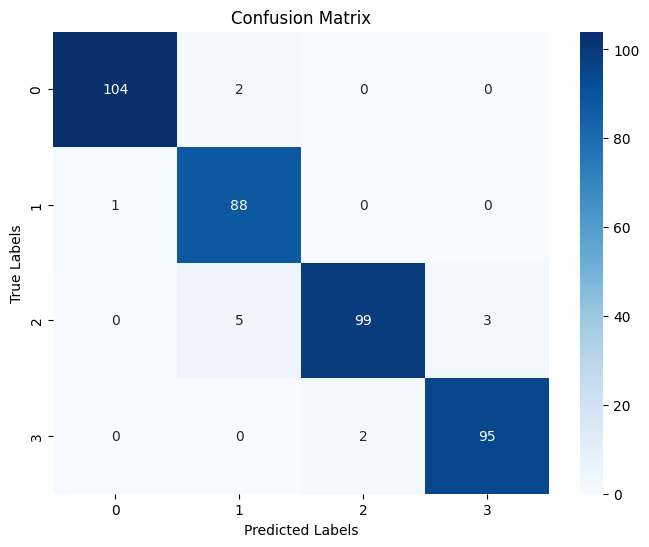

In [86]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### **9. Saving Results and Best Model**

After performing the grid search and obtaining the best model, it is crucial to save the results and the model for future use. This section outlines the steps to save the grid search results and the best model, and how to load the saved model to evaluate its performance.

##### **Saving the Best Model**

In [ ]:
# Save the best model to a file
joblib.dump(grid_search.best_estimator_, './Models/best_logistic_regression_model.pkl')

print("Best model saved as 'best_logistic_regression_model.pkl'")

Best model saved as 'best_logistic_regression_model.pkl'


##### **Saving the Grid Search Results**

In [87]:
# Convert grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Drop any rows with NaN values to clean up the data
results.dropna(axis=0, inplace=True)

# Save the results to a CSV file
results.to_csv('./Models/grid_search_results.csv', index=False)

print("Grid search results saved as 'grid_search_results.csv'")

Grid search results saved as 'grid_search_results.csv'


#### Loading the Saved Model For Prediction Stage

After saving the model, you may want to load it at a later stage to make predictions or evaluate its performance on new data.

In [91]:
# Load the best model from the file
loaded_model = joblib.load('./Models/best_logistic_regression_model.pkl')

## **🔗 Summary**

Through this process, we've completed the data preparation, feature engineering, model training, and evaluation phases. We applied different logistic regression models, evaluated their performance, and visualized the results to make an informed decision about the best model for predicting mobile phone price ranges.

# 🌐 Deploying the Model: Bringing Predictions to Life

In this final section, we take our machine learning model from the confines of our development environment and deploy it to the web, making it accessible and useful for everyone. With the power of Dash, we transform our trained model into an interactive application where users can input features and receive real-time predictions on mobile phone price ranges.

Let's embark on the journey of making our model truly impactful!

##  **Loading the Saved Model**

After saving the model, you may want to load it at a later stage to make predictions or evaluate its performance on new data.

In [3]:
df = pd.read_csv('./Data.csv')

In [8]:
import joblib
# Load the best model from the file
loaded_model = joblib.load('./Models/best_logistic_regression_model.pkl')

## Function: `preprocess_and_predict`

This function preprocesses a dataset, extracts numerical and categorical features, and performs predictions using a pre-trained machine learning model. It includes several steps such as scaling, one-hot encoding, and feature engineering to ensure the data is in the correct format for model prediction.

### Function Definition

```python
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

def preprocess_and_predict(input_data, model=None, scaler_path=None, encoder_path=None):
    # Print the columns for debugging
    print("Available columns:", input_data.columns)
    
    scaler = joblib.load(scaler_path)
    
    encoder = joblib.load(encoder_path)
    # Step 1: Specifying the categorical columns manually
    categorical_columns = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']
    
    # Adjust column names to match the DataFrame
    categorical_columns = [col for col in categorical_columns if col in input_data.columns]
    
    # Extracting categorical data and converting to integers
    categorical_data = input_data[categorical_columns].astype('int')
    
    # Identifying numerical columns by excluding categorical and target columns
    numerical_columns = [col for col in input_data.columns if col not in categorical_data.columns]
    numerical_data = input_data[numerical_columns]
    
    # RAM Conversion (MB to GB)
    numerical_data['ram'] = numerical_data['ram'] / 1024
    
    # Screen Area Calculation
    numerical_data['sc_area'] = numerical_data['sc_h'] * numerical_data['sc_w']
    
    # Battery Efficiency Calculation
    numerical_data['Battery_Efficiency'] = numerical_data['talk_time'] / numerical_data['battery_power']
    
    # New Feature: New_1
    categorical_data['New_1'] = ((categorical_data['four_g'] == 1) & (categorical_data['three_g'] == 1)).astype(int)
    
    # Step 2: Scaling Numerical Features using Min-Max Scaling
    numerical_data_scaled = pd.DataFrame(scaler.transform(numerical_data), columns=numerical_columns)
    
    # One-Hot Encoding Categorical Features if encoder is provided
    categorical_data_encoded = pd.DataFrame(encoder.transform(categorical_data), columns=encoder.get_feature_names_out())
    
    # Step 3: Concatenate the transformed features
    features = pd.concat([numerical_data_scaled, categorical_data_encoded], axis=1)
    
    # Making Predictions
    if model:
        predictions = model.predict(features)
        return predictions
    else:
        print("No model provided for predictions.")
        return None
```

### Parameters

- **`input_data (pd.DataFrame)`**: The input dataset containing the features required for prediction. The dataset can include both numerical and categorical features.
  
- **`model (sklearn model)`**: The pre-trained machine learning model that will be used to make predictions We Trained It Before.

### Returns

- **`predictions (np.array)`**: The predictions generated by the provided model based on the preprocessed features.

### Description

1. **Feature Engineering**:
   - **RAM Conversion**: If the `ram` column is present, it converts RAM from MB to GB.
   - **Screen Area Calculation**: If `sc_h` (screen height) and `sc_w` (screen width) columns exist, it calculates the screen area.
   - **Battery Efficiency**: If `battery_power` and `talk_time` columns are available, it calculates the battery efficiency.
   - **New Feature (`New_1`)**: Creates a new feature based on whether both `four_g` and `three_g` are present.

2. **Scaling**: The numerical features are scaled using Min-Max Scaling to ensure they are on a comparable scale for the model.

3. **One-Hot Encoding**: The categorical features are one-hot encoded to convert them into a numerical format suitable for the model.

4. **Model Prediction**: After preprocessing, the function uses the provided model to predict the outcomes based on the preprocessed data.

In [12]:

def preprocess_and_predict(input_data, model=None, scaler_path=None, encoder_path=None):
    # Print the columns for debugging
    print("Available columns:", input_data.columns)
    
    scaler = joblib.load(scaler_path)
    
    encoder = joblib.load(encoder_path)
    # Step 1: Specifying the categorical columns manually
    categorical_columns = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']
    
    # Adjust column names to match the DataFrame
    categorical_columns = [col for col in categorical_columns if col in input_data.columns]
    
    # Extracting categorical data and converting to integers
    categorical_data = input_data[categorical_columns].astype('int')
    
    # Identifying numerical columns by excluding categorical and target columns
    numerical_columns = [col for col in input_data.columns if col not in categorical_data.columns]
    numerical_data = input_data[numerical_columns]
    
    # RAM Conversion (MB to GB)
    numerical_data['ram'] = numerical_data['ram'] / 1024
    
    # Screen Area Calculation
    numerical_data['sc_area'] = numerical_data['sc_h'] * numerical_data['sc_w']
    
    # Battery Efficiency Calculation
    numerical_data['Battery_Efficiency'] = numerical_data['talk_time'] / numerical_data['battery_power']
    
    # New Feature: New_1
    categorical_data['New_1'] = ((categorical_data['four_g'] == 1) & (categorical_data['three_g'] == 1)).astype(int)
    
    # Step 2: Scaling Numerical Features using Min-Max Scaling
    numerical_data_scaled = pd.DataFrame(scaler.transform(numerical_data), columns=numerical_columns)
    
    # One-Hot Encoding Categorical Features if encoder is provided
    categorical_data_encoded = pd.DataFrame(encoder.transform(categorical_data), columns=encoder.get_feature_names_out())
    
    # Step 3: Concatenate the transformed features
    features = pd.concat([numerical_data_scaled, categorical_data_encoded], axis=1)
    
    # Making Predictions
    if model:
        predictions = model.predict(features)
        return predictions
    else:
        print("No model provided for predictions.")
        return None

In [13]:
# Assuming `data` is your original DataFrame
first_row = df.iloc[0:1,:-1]  # Extract the first row

first_row

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1


In [14]:
# Example usage:
predictions = preprocess_and_predict(first_row, model=loaded_model, scaler_path='./Models/scaler.pkl', encoder_path='./Models/one_hot_encoder_columns.joblib')

# Print the prediction
print("Prediction for the first row of data:", predictions)

Available columns: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


/tmp/ipykernel_279970/1467844763.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['ram'] = numerical_data['ram'] / 1024
/tmp/ipykernel_279970/1467844763.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['sc_area'] = numerical_data['sc_h'] * numerical_data['sc_w']
/tmp/ipykernel_279970/1467844763.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

ValueError: Shape of passed values is (1, 15), indices imply (1, 13)

## Deploy As Web Page

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd

# Initialize the Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Mobile Phone Price Prediction"),

    html.Label("Battery Power (mAh):"),
    dcc.Input(id='battery_power', type='number', value=1000),

    html.Label("RAM (GB):"),
    dcc.Input(id='ram', type='number', value=2),

    html.Label("Screen Height (px):"),
    dcc.Input(id='sc_height', type='number', value=800),

    html.Label("Screen Width (px):"),
    dcc.Input(id='sc_width', type='number', value=600),

    html.Label("Talk Time (hours):"),
    dcc.Input(id='talk_time', type='number', value=10),

    html.Label("3G Support (1 for Yes, 0 for No):"),
    dcc.Input(id='three_g', type='number', value=1),

    html.Label("4G Support (1 for Yes, 0 for No):"),
    dcc.Input(id='four_g', type='number', value=1),

    html.Label("WiFi Support (1 for Yes, 0 for No):"),
    dcc.Input(id='wifi', type='number', value=1),

    html.Label("Bluetooth Support (1 for Yes, 0 for No):"),
    dcc.Input(id='blue', type='number', value=1),

    html.Label("Dual SIM Support (1 for Yes, 0 for No):"),
    dcc.Input(id='dual_sim', type='number', value=1),

    html.Label("Number of Cores:"),
    dcc.Input(id='n_cores', type='number', value=4),

    html.Button('Predict', id='predict_button', n_clicks=0),

    html.Div(id='prediction_output')
])

@app.callback(
    Output('prediction_output', 'children'),
    [Input('predict_button', 'n_clicks')],
    [Input('battery_power', 'value'),
     Input('ram', 'value'),
     Input('sc_height', 'value'),
     Input('sc_width', 'value'),
     Input('talk_time', 'value'),
     Input('three_g', 'value'),
     Input('four_g', 'value'),
     Input('wifi', 'value'),
     Input('blue', 'value'),
     Input('dual_sim', 'value'),
     Input('n_cores', 'value')]
)
def update_prediction(n_clicks, battery_power, ram, sc_height, sc_width, talk_time, three_g, four_g, wifi, blue, dual_sim, n_cores):
    if n_clicks > 0:
        # Calculate screen area and battery efficiency
        sc_area = sc_height * sc_width
        battery_efficiency = talk_time / battery_power
        
        # Construct input data
        input_data = pd.DataFrame({
            'battery_power': [battery_power],
            'ram': [ram * 1024],  # Convert GB to MB
            'sc_area': [sc_area],
            'battery_efficiency': [battery_efficiency],
            'three_g': [three_g],
            'four_g': [four_g],
            'wifi': [wifi],
            'blue': [blue],
            'dual_sim': [dual_sim],
            'n_cores': [n_cores]
        })
        
        # Get the final prediction using voting
        final_prediction = predict_with_voting(input_data)
        
        return f"The predicted price range is: {final_prediction}"

if __name__ == '__main__':
    app.run_server(debug=True)